# Importing Necessary Libraries

Name:Venkata Avinash

In [66]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl

# Reading the data

In [67]:
data=pd.read_csv('winequality-red.csv')
#print(data.head())
print (data.shape)

(1599, 12)


## Finding the NA values and moving on

In [68]:
print(data.groupby(['quality']).count())
print(data.isnull().sum())

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                   10                10           10              10   
4                   53                53           53              53   
5                  681               681          681             681   
6                  638               638          638             638   
7                  199               199          199             199   
8                   18                18           18              18   

         chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  \
quality                                                                       
3               10                   10                    10       10   10   
4               53                   53                    53       53   53   
5              681                  681                   681      681  681   
6              638  

In [69]:
X = data.values[:,0:11]
Y=data.values[:,11]

## Create linear regression object
## Train the model using the training sets

In [70]:

linreg = LinearRegression()
linreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
print (linreg.predict(X[:11]))

[5.03285045 5.13787975 5.20989474 5.69385794 5.03285045 5.06557035
 5.1070693  5.34370699 5.33670489 5.65840581 5.06158249]


## Compute RMSE on training data
## constuct a vector of errors

In [72]:

p = linreg.predict(X)
err = abs(p-Y)
print (err[:10])

[0.03285045 0.13787975 0.20989474 0.30614206 0.03285045 0.06557035
 0.1070693  1.65629301 1.66329511 0.65840581]


## Dot product of error vector with itself gives us the sum of squared errors
## Compute RMSE

In [73]:
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
print (rmse_train)

0.6455750670692045


## We can view the regression coefficients

In [74]:
print ('Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [ 2.49905527e-02 -1.08359026e+00 -1.82563948e-01  1.63312698e-02
 -1.87422516e+00  4.36133331e-03 -3.26457970e-03 -1.78811638e+01
 -4.13653144e-01  9.16334413e-01  2.76197699e-01]


## Plot outputs

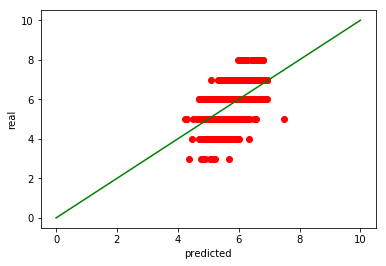

In [76]:

%matplotlib inline
pl.plot(p, Y,'ro')
pl.plot([0,10],[0,10], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [ ]:
# Now let's compute RMSE using 10-fold x-validation

In [77]:

kf = KFold(len(X), n_folds=10)
xval_err = 0
for train,test in kf:
    linreg.fit(X[train],Y[train])
    p = linreg.predict(X[test])
    e = p-Y[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(X))

In [79]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.6456
RMSE on 10-fold CV: 0.6597


## Create linear regression object with a ridge coefficient 0.5
## Train the model using the training set

In [81]:

ridge = Ridge(fit_intercept=True, alpha=0.5)

ridge.fit(X,Y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [84]:
# Compute RMSE on training data
# p = np.array([ridge.predict(xi) for xi in x])
p = ridge.predict(X)
err = p-Y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(X), n_folds=10)
xval_err = 0
for train,test in kf:
    ridge.fit(X[train],Y[train])
    p = ridge.predict(X[test])
    e = p-Y[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(X))

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Ridge Regression
RMSE on training: 0.6492
RMSE on 10-fold CV: 0.6588


In [86]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(X,Y)
    p = ridge.predict(X)
    err = p-Y
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(len(X), n_folds=10)
    xval_err = 0
    for train, test in kf:
        ridge.fit(X[train], Y[train])
        p = ridge.predict(X[test])
        err = p - Y[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 0.6457		 0.6591
0.418	 0.6458		 0.6588
0.826	 0.6460		 0.6589
1.234	 0.6463		 0.6589
1.642	 0.6465		 0.6590
2.050	 0.6467		 0.6591
2.458	 0.6470		 0.6593
2.866	 0.6472		 0.6594
3.274	 0.6474		 0.6595
3.682	 0.6476		 0.6596
4.090	 0.6478		 0.6597
4.498	 0.6480		 0.6598
4.906	 0.6482		 0.6599
5.313	 0.6484		 0.6600
5.721	 0.6486		 0.6600
6.129	 0.6488		 0.6601
6.537	 0.6490		 0.6602
6.945	 0.6491		 0.6603
7.353	 0.6493		 0.6604
7.761	 0.6495		 0.6605
8.169	 0.6496		 0.6606
8.577	 0.6498		 0.6607
8.985	 0.6500		 0.6608
9.393	 0.6501		 0.6609
9.801	 0.6503		 0.6610
10.209	 0.6504		 0.6611
10.617	 0.6506		 0.6612
11.025	 0.6507		 0.6613
11.433	 0.6509		 0.6613
11.841	 0.6510		 0.6614
12.249	 0.6512		 0.6615
12.657	 0.6513		 0.6616
13.065	 0.6514		 0.6617
13.473	 0.6516		 0.6618
13.881	 0.6517		 0.6619
14.289	 0.6519		 0.6620
14.697	 0.6520		 0.6621
15.104	 0.6521		 0.6622
15.512	 0.6523		 0.6623
15.920	 0.6524		 0.6624
16.328	 0.6526		 0

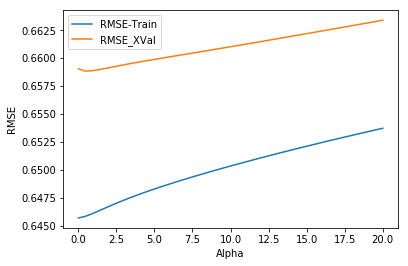

In [87]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

## COMPARING THE THREE MODEL'S RMSE AGAINST CV

In [91]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a))
        ]:
    met.fit(X,Y)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(X)
    e = p-Y
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(len(X), n_folds=10)
    err = 0
    for train,test in kf:
        met.fit(X[train],Y[train])
        p = met.predict(X[test])
        e = p-Y[test]
        err += np.dot(e,e)

    rmse_10cv = np.sqrt(err/len(X))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print ("\n")

Method: linear regression
RMSE on training: 0.6456
RMSE on 10-fold CV: 0.6597


Method: lasso
RMSE on training: 0.7609
RMSE on 10-fold CV: 0.7707


Method: ridge
RMSE on training: 0.6458
RMSE on 10-fold CV: 0.6589


